PROJECT: HR ANALYTIC

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [140]:
dt=pd.read_csv("../DataSets/HR_Attrition.csv")

In [142]:
dt

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


**1] HANDLING MISSING DATA & FILLING NAN-VALUES**

In [146]:
dt.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [148]:
dt.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [150]:
dt.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

[Text(0, 0, '237'), Text(0, 0, '1233')]

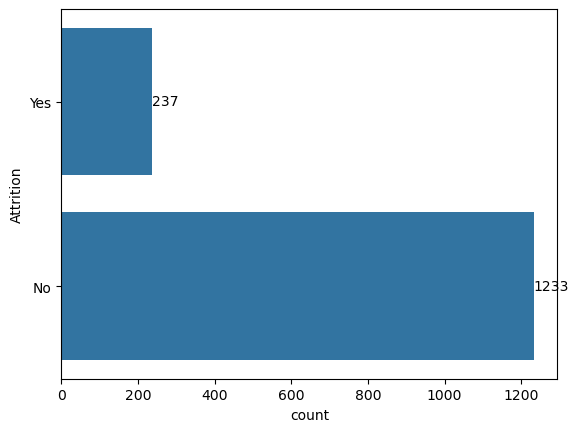

In [152]:
a=sb.countplot(dt.Attrition)
a.bar_label(a.containers[0])

**The Above graph gives us count of Attrition(yes/no).**

**2] Idendfying Key Drivers of Employee Attrion**


***Attrition-Based Segmentation**



In [157]:
employees_left=dt[dt.Attrition=="Yes"]
employees_stayed=dt[dt.Attrition=="No"]
num_employees_left=employees_left.shape[0]
num_employees_stayed=employees_stayed.shape[0]

In [159]:
Total_Employees=dt.shape[0]


In [161]:
attrition_rate_left_employees = (num_employees_left / Total_Employees) * 100
attrition_rate_stayed_employees = (num_employees_stayed / Total_Employees) * 100

In [163]:
attrition_rate_left_employees

16.122448979591837

In [165]:
attrition_rate_stayed_employees

83.87755102040816

In [167]:
a=dt.groupby("Attrition")["Age"].mean()

[Text(0, 0, '37.5612'), Text(0, 0, '33.6076')]

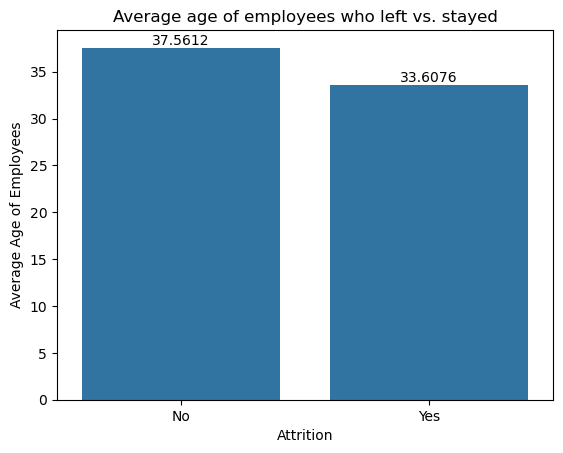

In [169]:
x=sb.barplot(x=a.index,y=a.values)
plt.ylabel("Average Age of Employees")
plt.title("Average age of employees who left vs. stayed")
x.bar_label(x.containers[0])

**From the Above Observation, The Above Bar graph shows Attrition of Emplyoees By Their Average Age.  
Average Age of Employees Who Left is 33.6 While the Age of Employees who Stayed is 33.56.**

In [172]:
attrition_by_gender = dt[dt.Attrition == 'Yes'].groupby('Gender').size()
total_by_gender = dt.groupby('Gender').size()
attrition_rate_by_gender = (attrition_by_gender / total_by_gender) * 100

In [174]:
attrition_rate_by_gender

Gender
Female    14.795918
Male      17.006803
dtype: float64

C:\Users\asus\AppData\Local\Temp\ipykernel_6088\2299780340.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  x=sb.barplot(x=attrition_rate_by_gender.index,y=attrition_rate_by_gender.values,palette="mako")


[Text(0, 0, '17.0068')]

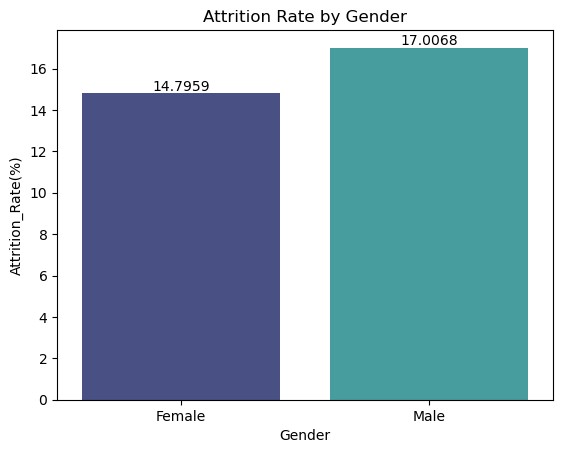

In [176]:
x=sb.barplot(x=attrition_rate_by_gender.index,y=attrition_rate_by_gender.values,palette="mako")
plt.ylabel("Attrition_Rate(%)")
plt.title("Attrition Rate by Gender")
x.bar_label(x.containers[0])
x.bar_label(x.containers[1])

**From Above Information:  
The Bar Graph Shows the Attrition Rate By Gender.  
The Attrition Rate of Male is 17 while Attrition Rate of Female is 14.8.**

In [179]:
attrition_rate_by_department = dt[dt['Attrition'] == 'Yes'].groupby('Department').size() / dt.groupby('Department').size() * 100

In [181]:
attrition_rate_by_department

Department
Human Resources           19.047619
Research & Development    13.839750
Sales                     20.627803
dtype: float64

IndexError: list index out of range

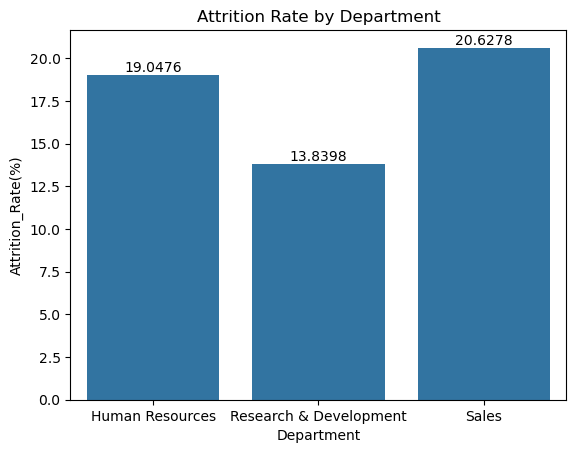

In [183]:
x=sb.barplot(x=attrition_rate_by_department.index,y=attrition_rate_by_department.values)
plt.ylabel("Attrition_Rate(%)")
plt.title("Attrition Rate by Department")
x.bar_label(x.containers[0])
x.bar_label(x.containers[1])
x.bar_label(x.containers[2])
plt.show()

**The Above Bargraph gives us the idea about the Attrition Rate By Each Department.  
Attrition Rate of Sales Department is 20.62% , Attrition Rate of R&D Department is 13.83% while The Attrition Rate of HR Department is 19.04%.  
The Attrition Rate Employees of Sales Department is Higher Than Others.**

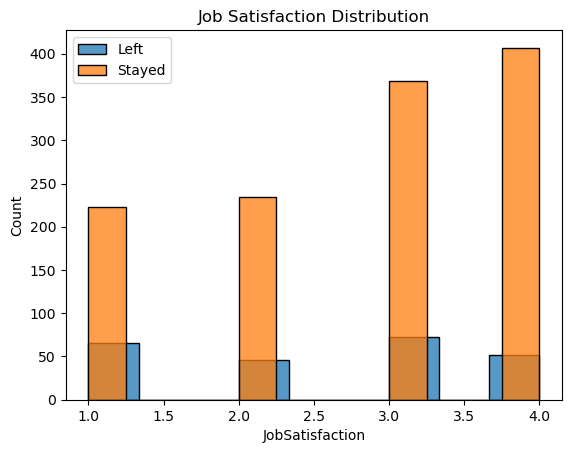

In [186]:
sb.histplot(employees_left['JobSatisfaction'], label="Left")
sb.histplot(employees_stayed['JobSatisfaction'], label="Stayed")
plt.title("Job Satisfaction Distribution")
plt.legend()


**From Above Information:  
We need to understand that At which JobSatisfaction Level How Many Number Employees are Left vs Stayed.**


In [189]:
a=dt.groupby("Attrition")["MonthlyIncome"].mean().reset_index()

In [191]:
a

,Attrition,MonthlyIncome
0,No,6832.739659
1,Yes,4787.092827


[Text(0, 0, '6832.74'), Text(0, 0, '4787.09')]

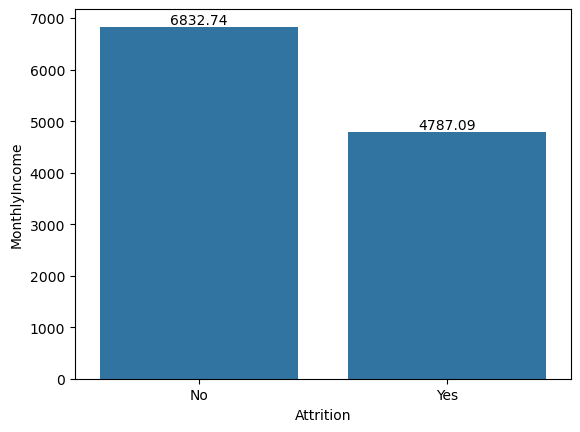

In [193]:
x=sb.barplot(x=a.Attrition, y=a.MonthlyIncome)
x.bar_label(x.containers[0])


**From Above Info:  
1.Employees with lower salaries tend to leave more.  
2.Employees with higher salaries are less likely to leave.**

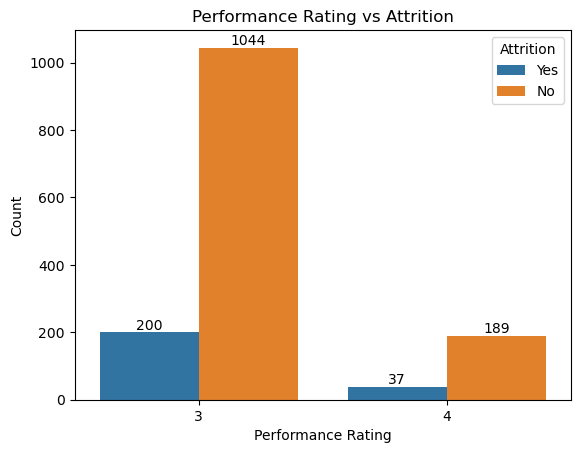

In [196]:
# Performance Rating Analysis
x=sb.countplot(dt,x="PerformanceRating", hue="Attrition")
x.bar_label(x.containers[0])
x.bar_label(x.containers[1])
plt.title("Performance Rating vs Attrition")
plt.xlabel("Performance Rating")
plt.ylabel("Count")
plt.show()

In [198]:
dt["Attrition"] = dt["Attrition"].apply(lambda x: 1 if x == "Yes" else 0)

C:\Users\asus\AppData\Local\Temp\ipykernel_6088\69386155.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  d=sb.barplot(x=dt["Department"], y=dt["Attrition"], ci=None, palette="coolwarm")
C:\Users\asus\AppData\Local\Temp\ipykernel_6088\69386155.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  d=sb.barplot(x=dt["Department"], y=dt["Attrition"], ci=None, palette="coolwarm")


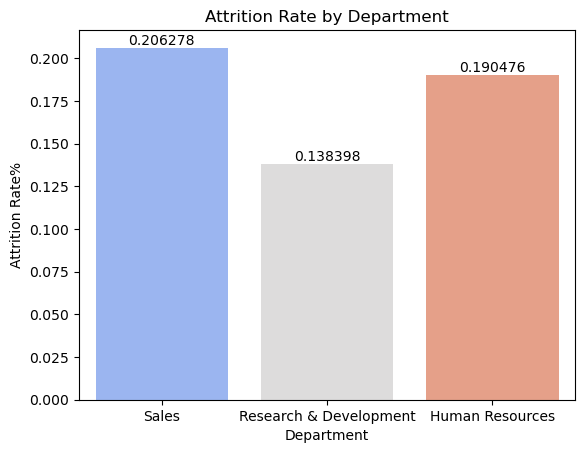

In [200]:
#Which employees group by Department are most Attrition
d=sb.barplot(x=dt["Department"], y=dt["Attrition"], ci=None, palette="coolwarm")
d.bar_label(d.containers[0])
d.bar_label(d.containers[1])
d.bar_label(d.containers[2])
plt.title("Attrition Rate by Department")
plt.ylabel("Attrition Rate%")
plt.xlabel("Department")
plt.show()

**The Above Information Helps to Analyze How Attrition Rate Effect By Each Department.  
Attrition Rate of Sales Department is 20.62% , Attrition Rate of R&D Department is 13.83% while The Attrition Rate of HR Department is 19.04%.  
The Attrition Rate Employees of Sales Department is Higher Than Others.**

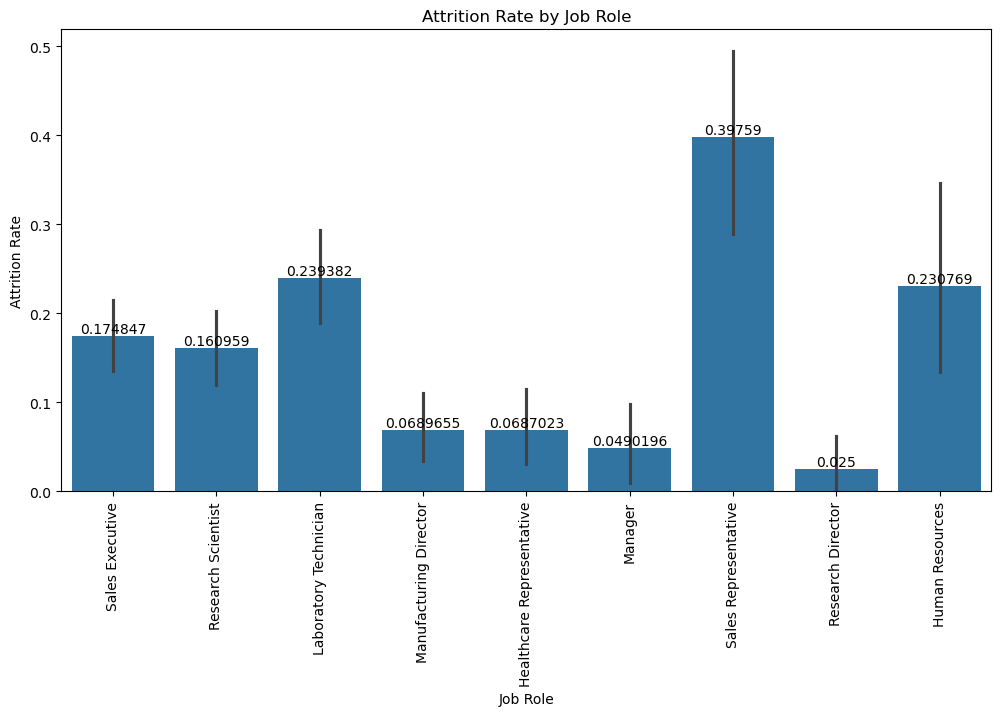

In [203]:
## **Attrition by Job Role**
plt.figure(figsize=(12,6))
x=sb.barplot(x=dt["JobRole"], y=dt["Attrition"])
x.bar_label(x.containers[0])
plt.xticks(rotation=90)
plt.title("Attrition Rate by Job Role")
plt.ylabel("Attrition Rate")
plt.xlabel("Job Role")
plt.show()

**The above Infromation Hepls to visualize How Attrition Rate Effect On Each Job Role.**

C:\Users\asus\AppData\Local\Temp\ipykernel_6088\2455308717.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.violinplot(x=dt["Attrition"], y=dt["MonthlyIncome"], palette="coolwarm")


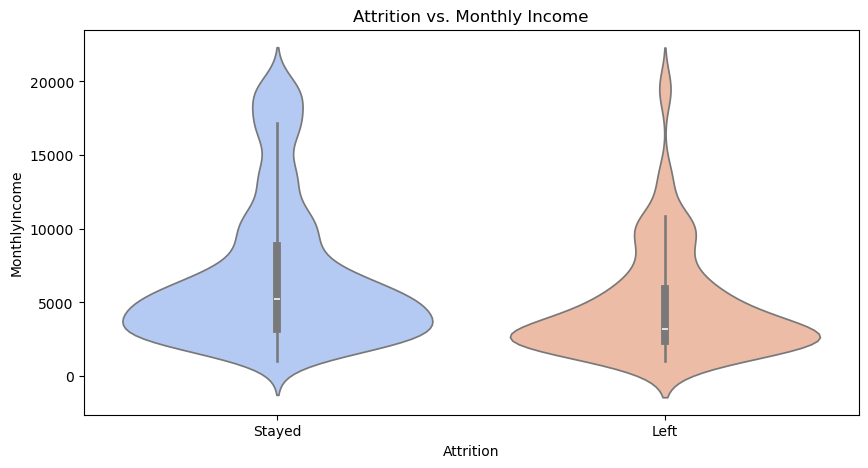

In [207]:
plt.figure(figsize=(10,5))
sb.violinplot(x=dt["Attrition"], y=dt["MonthlyIncome"], palette="coolwarm")
plt.xticks(ticks=[0,1], labels=["Stayed", "Left"])
plt.title("Attrition vs. Monthly Income")
plt.show()

**Insights from Violin Plot:**
1.Employees with lower salaries tend to leave more.
2.Employees with higher salaries are less likely to leave.

In [210]:
corr=dt[["MonthlyIncome","YearsAtCompany","TotalWorkingYears","JobLevel","DistanceFromHome"]].corr()

In [212]:
corr


,MonthlyIncome,YearsAtCompany,TotalWorkingYears,JobLevel,DistanceFromHome
MonthlyIncome,1.000000,0.514285,0.772893,0.950300,-0.017014
YearsAtCompany,0.514285,1.000000,0.628133,0.534739,0.009508
TotalWorkingYears,0.772893,0.628133,1.000000,0.782208,0.004628
JobLevel,0.950300,0.534739,0.782208,1.000000,0.005303
DistanceFromHome,-0.017014,0.009508,0.004628,0.005303,1.000000


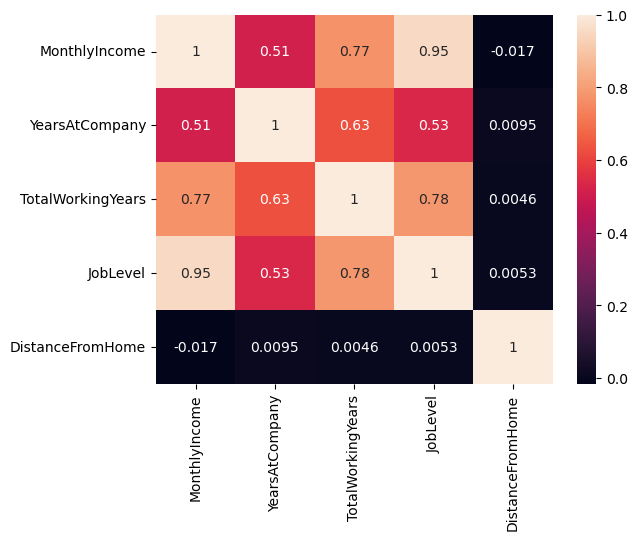

In [214]:
sb.heatmap(corr,annot=True)
plt.show()

**Correlation Hepls To Visualize the Distribution Of the Numerical Data.**  
**● Heatmap Shows pairwise correlations between variables.  
● Values range from -1 (perfect negative correlation) to +1 (perfect positive correlation).  
● High positive correlations may indicate direct relationships, while high negative correlations indicate inverse relationships.**  
**●Positive correlation (close to +1):** When one variable increases, the other also increases.  
**●Negative correlation (close to -1):** When one variable increases, the other decreases.  
**●No correlation (around 0):** No linear relationship between the variables.

**2] Exploring Performance Indicators** 

A key challenge is determining the metrics that distinguish high-performing employees from others. 
This requires identifying correlations between performance ratings and other attributes.

C:\Users\asus\AppData\Local\Temp\ipykernel_27000\3726655964.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a=sb.barplot(x=dt.JobRole, y=dt.PerformanceRating, palette="coolwarm")


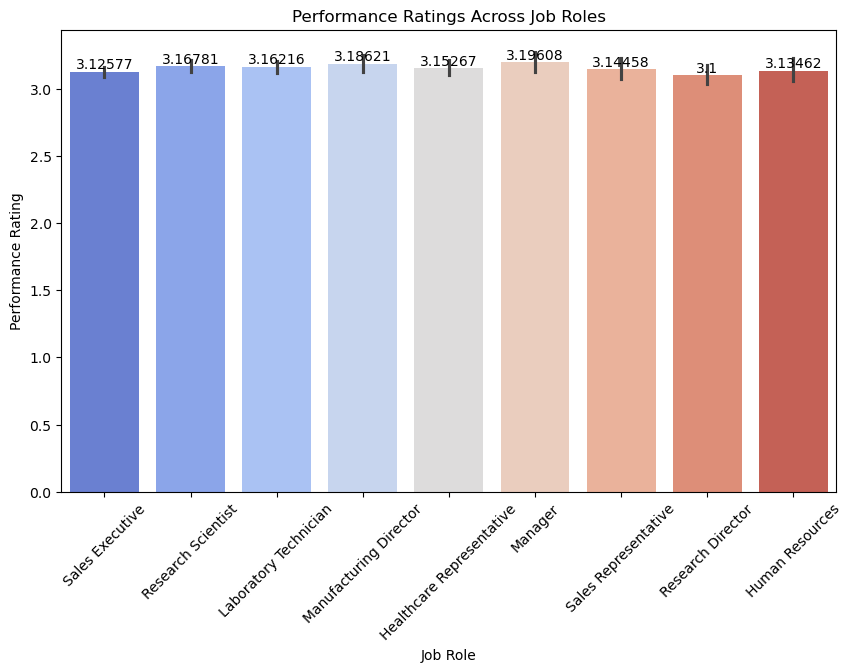

In [44]:
plt.figure(figsize=(10, 6))
a=sb.barplot(x=dt.JobRole, y=dt.PerformanceRating, palette="coolwarm")
a.bar_label(a.containers[0])
a.bar_label(a.containers[1])
a.bar_label(a.containers[2])
a.bar_label(a.containers[3])
a.bar_label(a.containers[4])
a.bar_label(a.containers[5])
a.bar_label(a.containers[6])
a.bar_label(a.containers[7])
a.bar_label(a.containers[8])
plt.xticks(rotation=45)
plt.title("Performance Ratings Across Job Roles")
plt.xlabel("Job Role")
plt.ylabel("Performance Rating")
plt.show()

C:\Users\asus\AppData\Local\Temp\ipykernel_27000\602305408.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.violinplot(x=dt.Department, y=dt.PerformanceRating, palette="coolwarm")


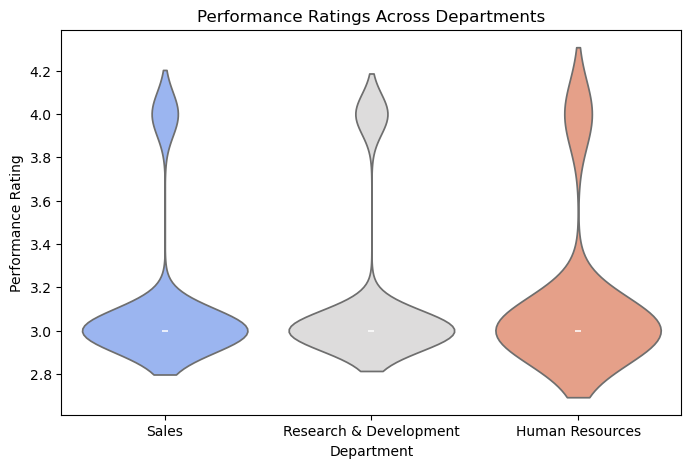

In [45]:
plt.figure(figsize=(8, 5))
sb.violinplot(x=dt.Department, y=dt.PerformanceRating, palette="coolwarm")
plt.title("Performance Ratings Across Departments")
plt.xlabel("Department")
plt.ylabel("Performance Rating")
plt.show()

**Insights from Violin Plot:**

1.Each Department such as Sales,R&D, Human Resources may have different performance rating distributions.

2.If any department has higher ratings, it could indicate better performance.

In [219]:
def tenure(x):
    if x>=0 and x<=5:
        return"New_Employees(0-5year)"
    elif x>5 and x<=10:
        return"Mid_Career_Emp(6-10)"
    elif x>10 and x<=20:
        return"Long_Term_Emp(10-20)"
    else:
        return"Permanent_Emp(21+)"

In [221]:
dt["Tenure"]=dt.YearsAtCompany.apply(tenure)

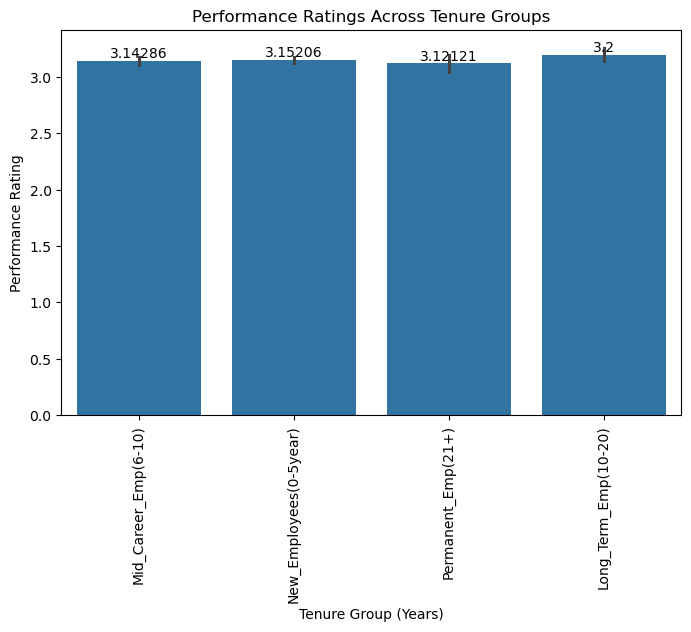

In [223]:
plt.figure(figsize=(8, 5))
x=sb.barplot(x=dt.Tenure, y=dt.PerformanceRating)
x.bar_label(x.containers[0])
plt.title("Performance Ratings Across Tenure Groups")
plt.xlabel("Tenure Group (Years)")
plt.ylabel("Performance Rating")
plt.xticks(rotation=90)
plt.show()

**The Performance Rating Across All Tenure Groups(years At Company) are Same Accept Long Term Employees have higher Rating than Others.**

In [226]:
corr_matrix= dt[["PerformanceRating", "EnvironmentSatisfaction", "JobSatisfaction",
    "RelationshipSatisfaction", "TrainingTimesLastYear",
    "JobInvolvement", "YearsAtCompany", "MonthlyIncome"]].corr()

In [228]:
corr_matrix

,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingTimesLastYear,JobInvolvement,YearsAtCompany,MonthlyIncome
PerformanceRating,1.000000,-0.029548,0.002297,-0.031351,-0.015579,-0.029071,0.003435,-0.017120
EnvironmentSatisfaction,-0.029548,1.000000,-0.006784,0.007665,-0.019359,-0.008278,0.001458,-0.006259
JobSatisfaction,0.002297,-0.006784,1.000000,-0.012454,-0.005779,-0.021476,-0.003803,-0.007157
RelationshipSatisfaction,-0.031351,0.007665,-0.012454,1.000000,0.002497,0.034297,0.019367,0.025873
TrainingTimesLastYear,-0.015579,-0.019359,-0.005779,0.002497,1.000000,-0.015338,0.003569,-0.021736
JobInvolvement,-0.029071,-0.008278,-0.021476,0.034297,-0.015338,1.000000,-0.021355,-0.015271
YearsAtCompany,0.003435,0.001458,-0.003803,0.019367,0.003569,-0.021355,1.000000,0.514285
MonthlyIncome,-0.017120,-0.006259,-0.007157,0.025873,-0.021736,-0.015271,0.514285,1.000000


<Axes: >

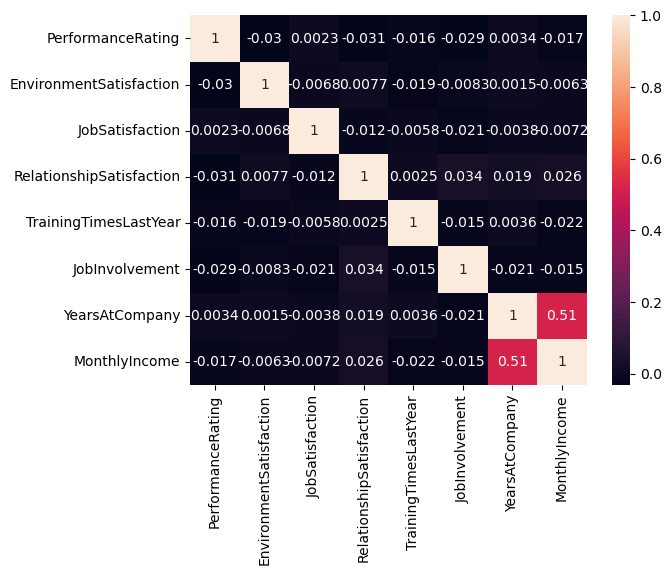

In [230]:

sb.heatmap(corr_matrix,annot=True)

**Visualize the performance trends using scatter plots, pair plots, and correlation heatmaps.

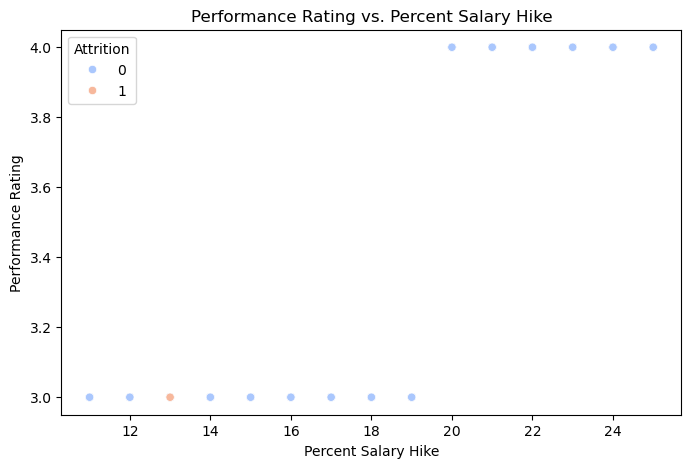

In [235]:
plt.figure(figsize=(8,5))
sb.scatterplot(x=dt["PercentSalaryHike"], y=dt["PerformanceRating"], hue=dt["Attrition"], palette="coolwarm")
plt.title("Performance Rating vs. Percent Salary Hike")
plt.xlabel("Percent Salary Hike")
plt.ylabel("Performance Rating")
plt.show()


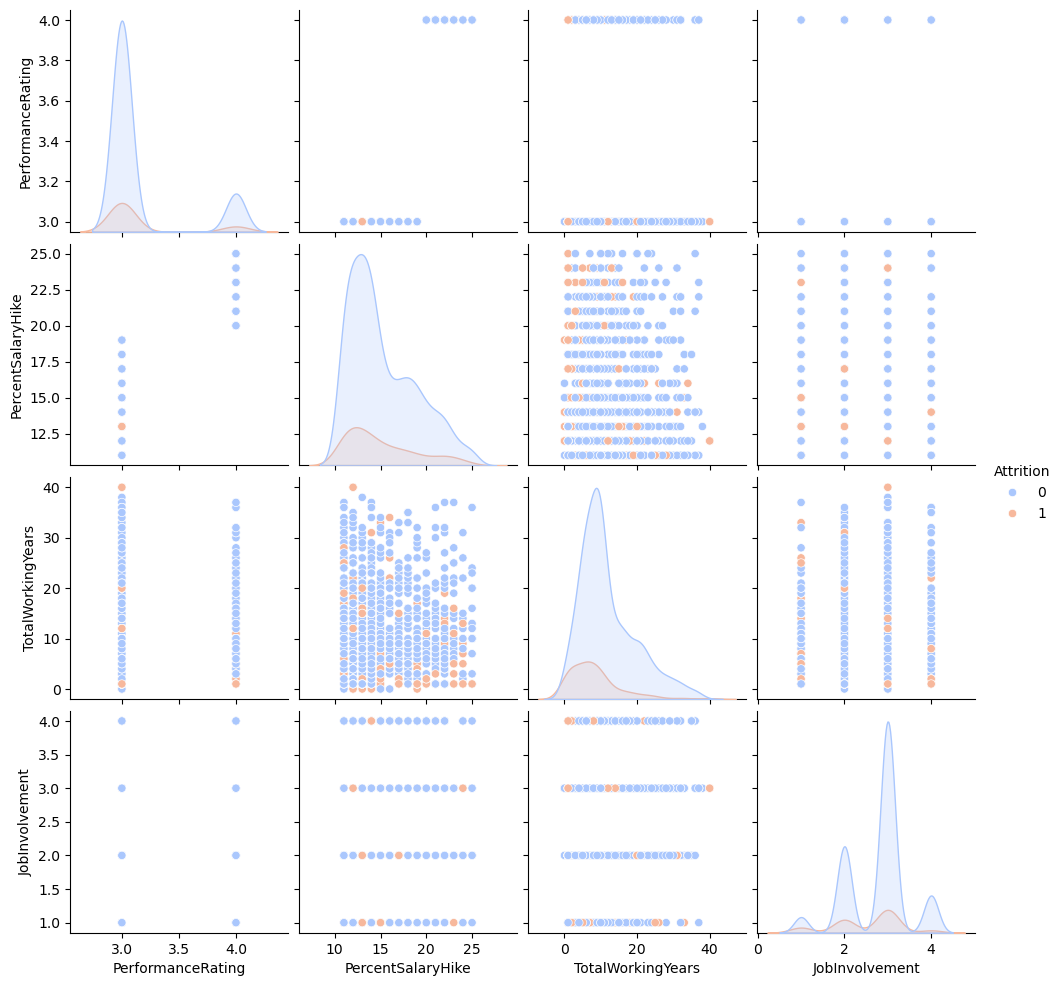

In [236]:
sb.pairplot(dt[["PerformanceRating", "PercentSalaryHike", "TotalWorkingYears", "JobInvolvement", "Attrition"]], hue="Attrition", palette="coolwarm")
plt.show()


**Pairlot Shows the pairwise relationship between different variables in a dataset(like Performance Rating,PercentSalaryHike,ETC.)**

In [246]:
corre=dt[["PercentSalaryHike","MonthlyIncome","WorkLifeBalance","JobInvolvement"]].corr()

In [248]:
corre

,PercentSalaryHike,MonthlyIncome,WorkLifeBalance,JobInvolvement
PercentSalaryHike,1.000000,-0.027269,-0.003280,-0.017205
MonthlyIncome,-0.027269,1.000000,0.030683,-0.015271
WorkLifeBalance,-0.003280,0.030683,1.000000,-0.014617
JobInvolvement,-0.017205,-0.015271,-0.014617,1.000000


<Axes: >

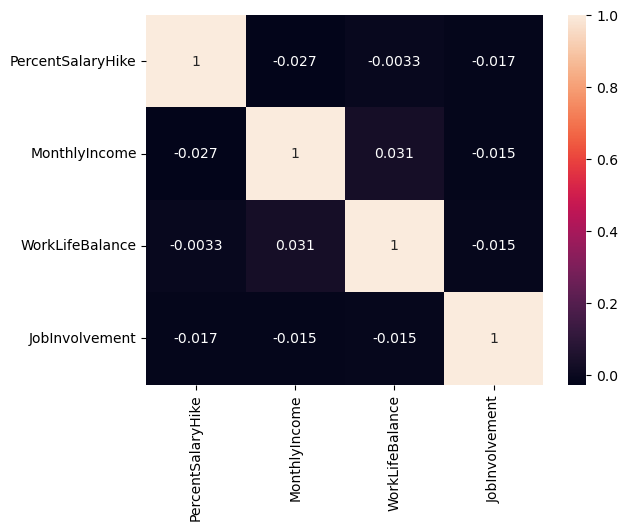

In [250]:
sb.heatmap(corre,annot=True)

In [254]:
satisfaction_corr = dt[['EnvironmentSatisfaction', 'JobSatisfaction','RelationshipSatisfaction', 'WorkLifeBalance', 'Attrition']].corr()

In [256]:
satisfaction_corr

,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,WorkLifeBalance,Attrition
EnvironmentSatisfaction,1.000000,-0.006784,0.007665,0.027627,-0.103369
JobSatisfaction,-0.006784,1.000000,-0.012454,-0.019459,-0.103481
RelationshipSatisfaction,0.007665,-0.012454,1.000000,0.019604,-0.045872
WorkLifeBalance,0.027627,-0.019459,0.019604,1.000000,-0.063939
Attrition,-0.103369,-0.103481,-0.045872,-0.063939,1.000000


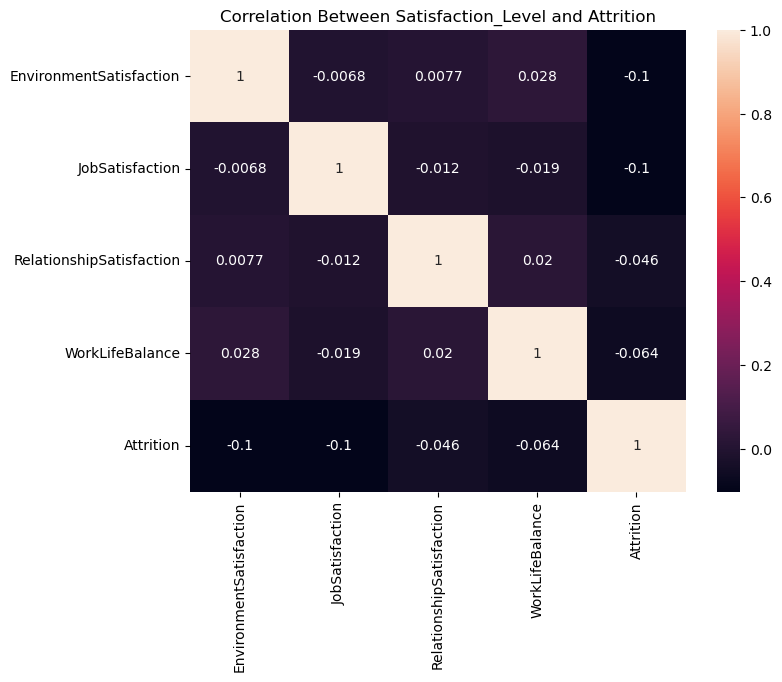

In [258]:
plt.figure(figsize=(8,6))
sb.heatmap(satisfaction_corr, annot=True)
plt.title('Correlation Between Satisfaction_Level and Attrition')
plt.show()

**Key Insights from heatmap**

1.Negative correlation between satisfaction Level and attrition it means higher satisfaction Level has lower attrition rate.

2.Job Satisfaction and Work-Life Balance often show stronger correlation with retention.


**To explore the impact of workplace factors (like training opportunities and promotion rates) on employee satisfaction and engagement, 
we can analyze the following key features:**

**Keys for Workplace Factors to Analyze:

1)TrainingTimesLastYear :– Number of training sessions attended.  
2)YearsSinceLastPromotion :– Time since the last promotion.    
3)JobInvolvement :– Level of engagement in the job (scale 1–4).  
4)JobLevel :– Current level/grade of the employee.   
5)PercentSalaryHike :– Salary increment percentage.  
6)PerformanceRating :– Recent performance assessment.  
7)JobSatisfaction, EnvironmentSatisfaction, RelationshipSatisfaction for Satisfaction Levels.


1.correlation analysis to see how workplace factors relate to satisfaction and engagement:

In [263]:
correlation= ['TrainingTimesLastYear', 'YearsSinceLastPromotion',
              'JobInvolvement', 'JobLevel', 'PercentSalaryHike','PerformanceRating', 
              'JobSatisfaction','EnvironmentSatisfaction', 'RelationshipSatisfaction']


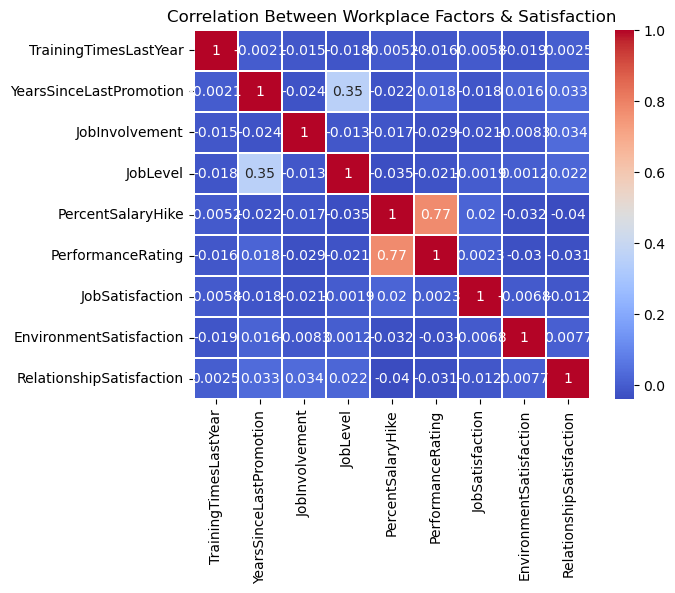

In [265]:
sb.heatmap(dt[correlation].corr(),annot=True, cmap='coolwarm',linewidths=0.3)
plt.title("Correlation Between Workplace Factors & Satisfaction")
plt.show()

2. Impact of Training on Job Satisfaction

C:\Users\asus\AppData\Local\Temp\ipykernel_6088\3092264569.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=dt.TrainingTimesLastYear, y=dt.JobSatisfaction, palette='Blues')


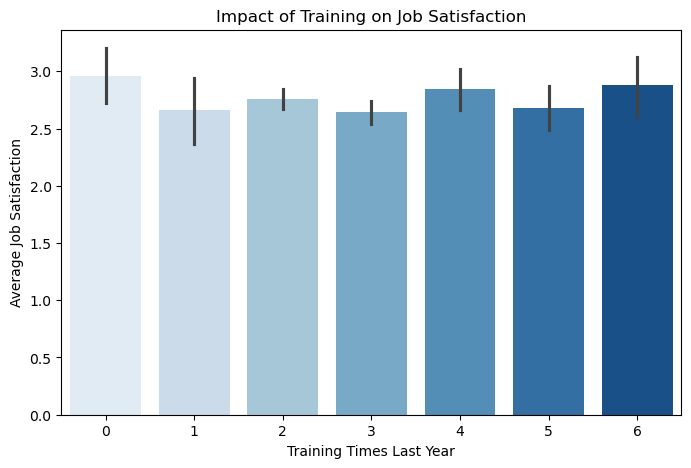

In [268]:
plt.figure(figsize=(8, 5))
sb.barplot(x=dt.TrainingTimesLastYear, y=dt.JobSatisfaction, palette='Blues')
plt.title("Impact of Training on Job Satisfaction")
plt.xlabel("Training Times Last Year")
plt.ylabel("Average Job Satisfaction")
plt.show()

C:\Users\asus\AppData\Local\Temp\ipykernel_6088\3089193249.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=dt.YearsSinceLastPromotion	, y=dt.JobSatisfaction, palette='Blues')


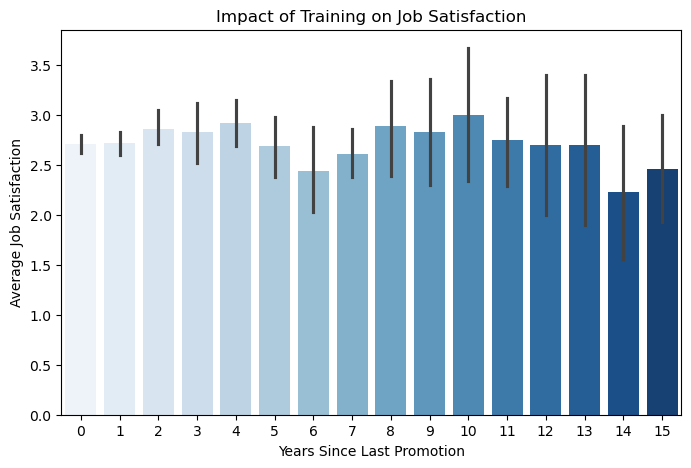

In [270]:
plt.figure(figsize=(8, 5))
sb.barplot(x=dt.YearsSinceLastPromotion	, y=dt.JobSatisfaction, palette='Blues')
plt.title("Impact of Training on Job Satisfaction")
plt.xlabel("Years Since Last Promotion")
plt.ylabel("Average Job Satisfaction")
plt.show()

**Insights from Impact of Training on Job Satisfaction**:

#Employees waiting longer for promotions tend to show lower satisfaction and higher attrition risk.

3.Engagement Levels by Job Involvement

C:\Users\asus\AppData\Local\Temp\ipykernel_6088\3472083796.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.violinplot(x=dt.Attrition, y=dt.JobInvolvement, palette='muted')


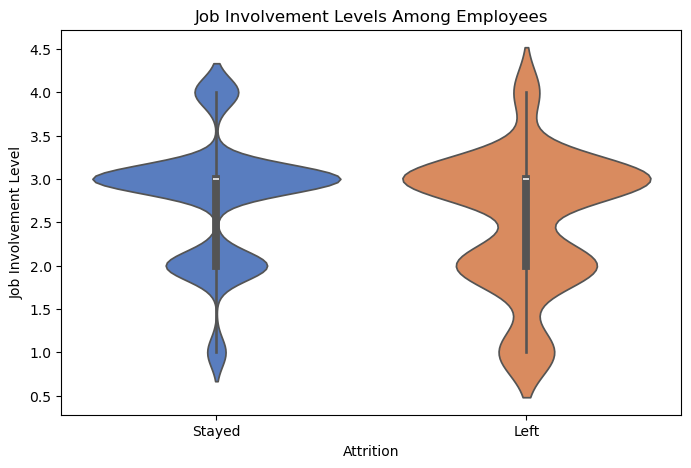

In [274]:
# Job Involvement vs Attrition
plt.figure(figsize=(8, 5))
sb.violinplot(x=dt.Attrition, y=dt.JobInvolvement, palette='muted')
plt.title("Job Involvement Levels Among Employees")
plt.xticks([0, 1], ['Stayed', 'Left'])
plt.xlabel("Attrition")
plt.ylabel("Job Involvement Level")
plt.show()


**Insight for Engagement Levels by Job Involvement:**
Strong predictor of engagement was low involvement have disengaged employees

**Mosaic Plot – Multivariate Relationships**



<Figure size 1000x800 with 0 Axes>

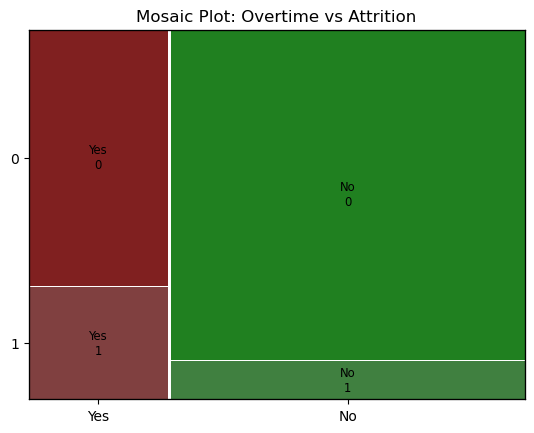

In [91]:
from statsmodels.graphics.mosaicplot import mosaic

# Mosaic plot for Attrition, Overtime
plt.figure(figsize=(10, 8))
mosaic(dt, ['OverTime', 'Attrition'], title='Mosaic Plot: Overtime vs Attrition')
plt.show()


**Insights from mosaic plot:**

*Shows the relationship between multiple categorical variables.

*Good for comparing attrition rates across overtime patterns.

**Descriptive Analysis** 

In [97]:
a=dt.describe()

In [98]:
a

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


**Describe()** function use to get an overview of numerical columns:-

This will help you get insights into measures like mean, median, standard deviation, min, max, and percentiles.

In [100]:
# Descriptive stats for categorical variables
x= dt.describe(include=['object'])

In [101]:
x

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime,Tenure
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,3,3,6,2,9,3,1,2,4
top,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No,New_Employees(0-5year)
freq,1043,961,606,882,326,673,1470,1054,776


In [103]:
s=[]
for i in dt.columns.tolist():
    if dt[i].dtypes=="object":
        s.append(i)

In [104]:
s

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime',
 'Tenure']

In [105]:
for j in s:
    print(j)
    print(dt[j].unique())
    print("")

BusinessTravel
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']

Department
['Sales' 'Research & Development' 'Human Resources']

EducationField
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']

Gender
['Female' 'Male']

JobRole
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']

MaritalStatus
['Single' 'Married' 'Divorced']

Over18
['Y']

OverTime
['Yes' 'No']

Tenure
['Mid_Career_Emp(6-10)' 'New_Employees(0-5year)' 'Permanent_Emp(21+)'
 'Long_Term_Emp(10-20)']



** **Visualization of Employee Distribution****

C:\Users\asus\AppData\Local\Temp\ipykernel_27000\3777243828.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  s=sb.countplot(dt,x='Department', palette='pastel')


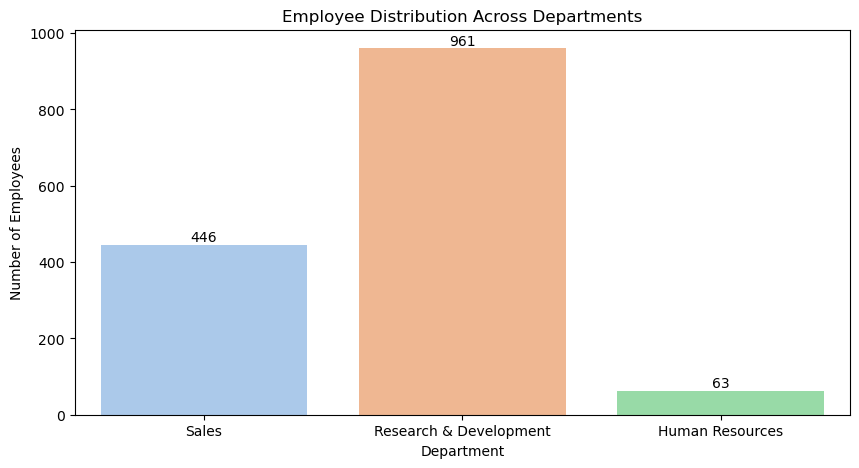

In [107]:
# Distribution of Employees Across Departments
plt.figure(figsize=(10, 5))
s=sb.countplot(dt,x='Department', palette='pastel')
s.bar_label(s.containers[0])
s.bar_label(s.containers[1])
s.bar_label(s.containers[2])
plt.title('Employee Distribution Across Departments')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.show()


**In Above Information:  
The Bar Graph Helps to Visualize the Distribution Of Employees Across Department.  
There are Total 1770 Employees. Out of 1770, Sales Department have 446 number of Employees , R&D Department have 961 Employees And Human Resources Have only 63 employess.**

C:\Users\asus\AppData\Local\Temp\ipykernel_27000\1002174391.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  x=sb.countplot(dt,x='JobRole', palette='muted')


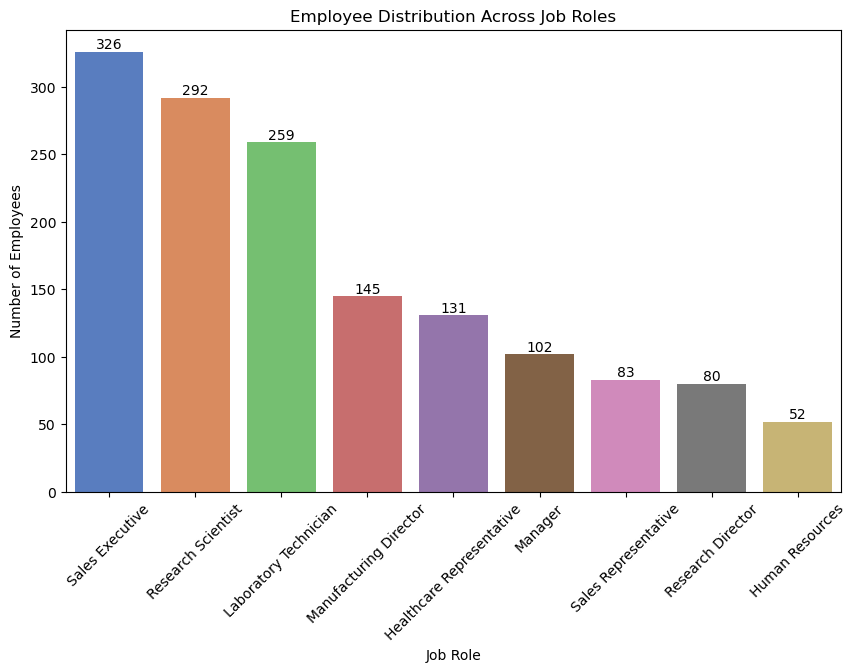

In [109]:
# Distribution of Employees Across Job Roles
plt.figure(figsize=(10, 6))
x=sb.countplot(dt,x='JobRole', palette='muted')
x.bar_label(x.containers[0])
x.bar_label(x.containers[1])
x.bar_label(x.containers[2])
x.bar_label(x.containers[3])
x.bar_label(x.containers[4])
x.bar_label(x.containers[5])
x.bar_label(x.containers[6])
x.bar_label(x.containers[7])
x.bar_label(x.containers[8])
plt.title('Employee Distribution Across Job Roles')
plt.xlabel('Job Role')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.show()

**From the Above Info:
The Bar Graph Helps to visualize the Distribution of Different Job Roles And Each Job Roles Have Distinct Number Of Employees.**

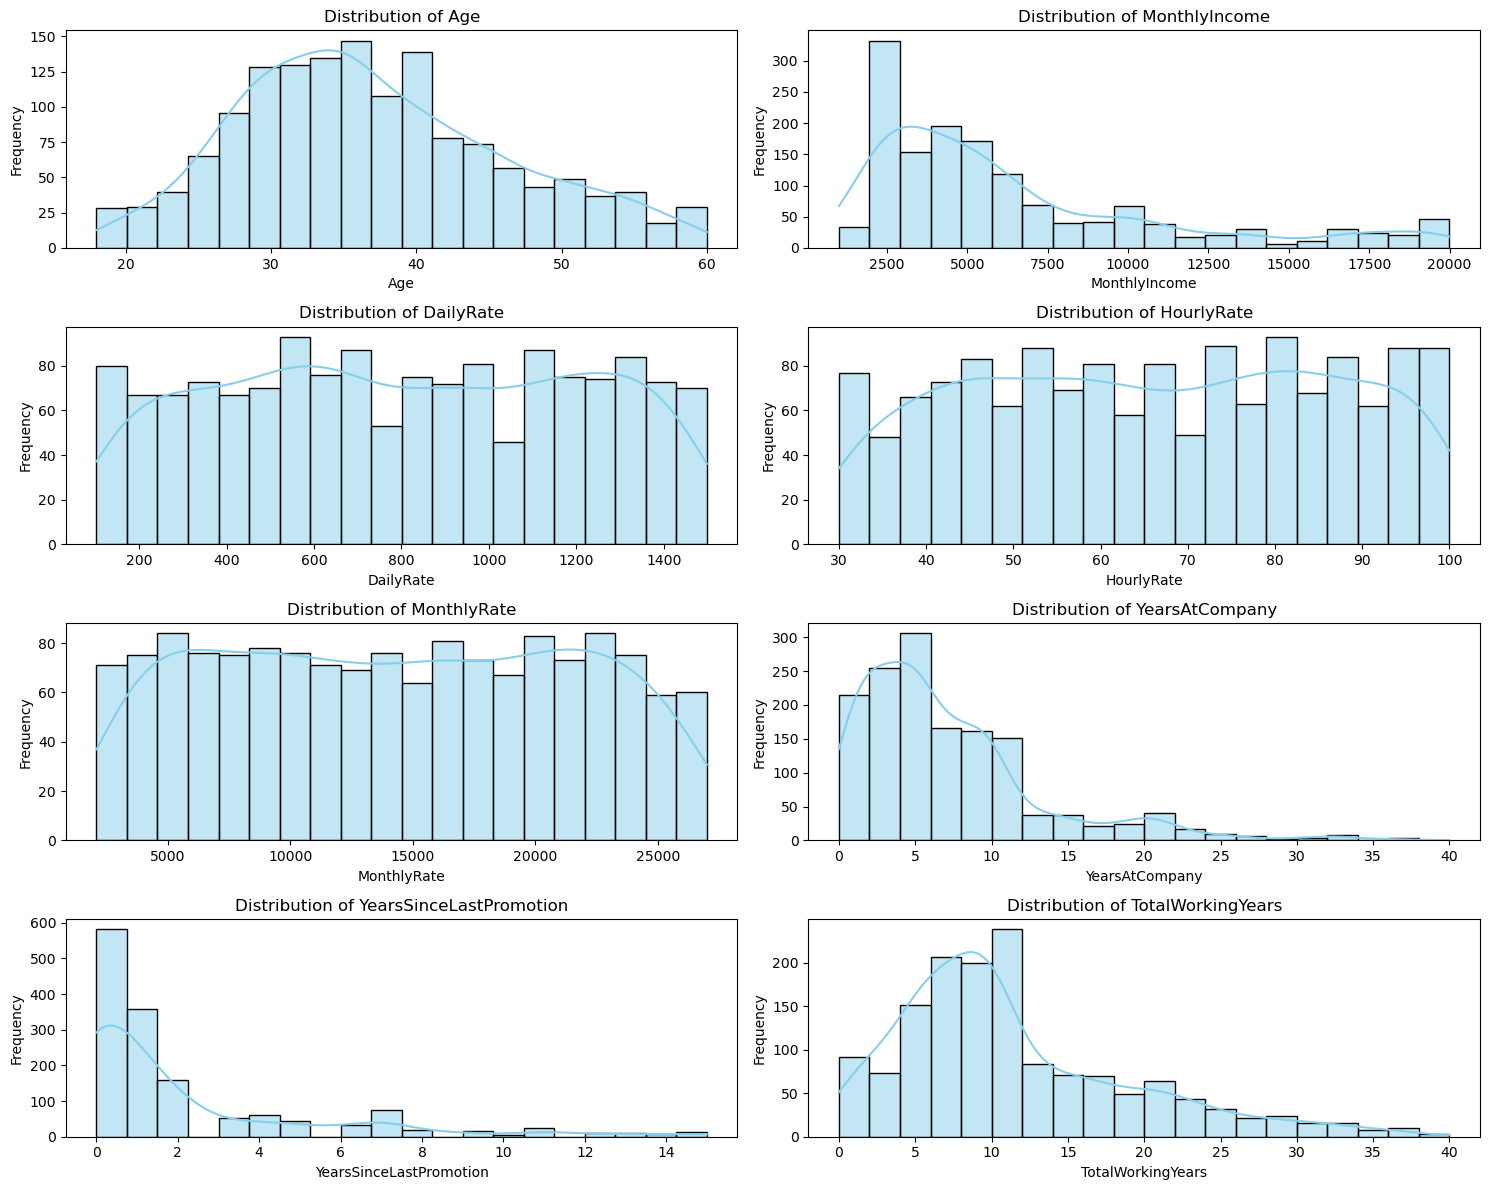

In [112]:
# List of numeric columns to visualize
numeric_columns = ['Age', 'MonthlyIncome', 'DailyRate', 'HourlyRate', 
                    'MonthlyRate', 'YearsAtCompany', 
                    'YearsSinceLastPromotion', 'TotalWorkingYears']

# histograms for each numeric column
plt.figure(figsize=(15, 12))

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(4, 2, i)
    sb.histplot(dt[col], bins=20, kde=True, color='skyblue')  # KDE adds a smooth curve
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


**To understand the distribution of numeric variables like Age and Salary in dataset, we can create histograms.   
Histograms helps to identify patterns such as Frequency and distribution.

**Correlation Analysis**

In [115]:
corr_matrix= dt[["PerformanceRating", "EnvironmentSatisfaction", "JobSatisfaction",
    "RelationshipSatisfaction", "TrainingTimesLastYear",
    "JobInvolvement", "YearsAtCompany", "MonthlyIncome"]].corr()

In [119]:
corr_matrix

,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingTimesLastYear,JobInvolvement,YearsAtCompany,MonthlyIncome
PerformanceRating,1.000000,-0.029548,0.002297,-0.031351,-0.015579,-0.029071,0.003435,-0.017120
EnvironmentSatisfaction,-0.029548,1.000000,-0.006784,0.007665,-0.019359,-0.008278,0.001458,-0.006259
JobSatisfaction,0.002297,-0.006784,1.000000,-0.012454,-0.005779,-0.021476,-0.003803,-0.007157
RelationshipSatisfaction,-0.031351,0.007665,-0.012454,1.000000,0.002497,0.034297,0.019367,0.025873
TrainingTimesLastYear,-0.015579,-0.019359,-0.005779,0.002497,1.000000,-0.015338,0.003569,-0.021736
JobInvolvement,-0.029071,-0.008278,-0.021476,0.034297,-0.015338,1.000000,-0.021355,-0.015271
YearsAtCompany,0.003435,0.001458,-0.003803,0.019367,0.003569,-0.021355,1.000000,0.514285
MonthlyIncome,-0.017120,-0.006259,-0.007157,0.025873,-0.021736,-0.015271,0.514285,1.000000


<Axes: >

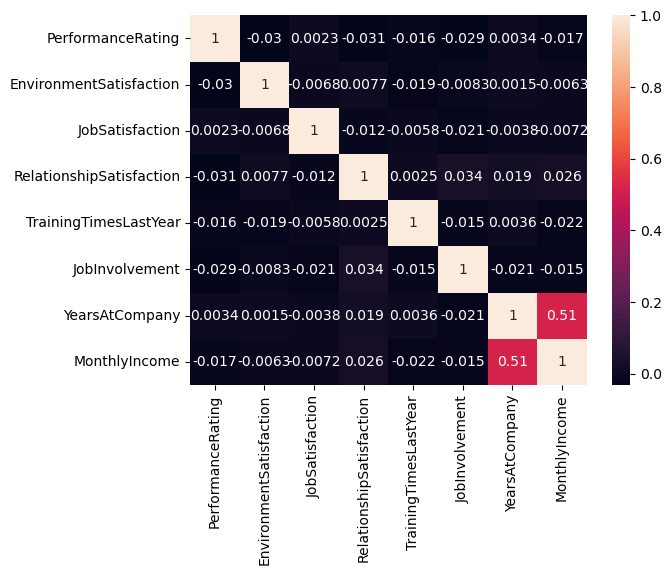

In [130]:
sb.heatmap(corr_matrix,annot=True)

**ATTRITION ANALYSIS**

C:\Users\asus\AppData\Local\Temp\ipykernel_27000\1868079152.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  z=sb.countplot(dt,x='Attrition',palette='Set2')


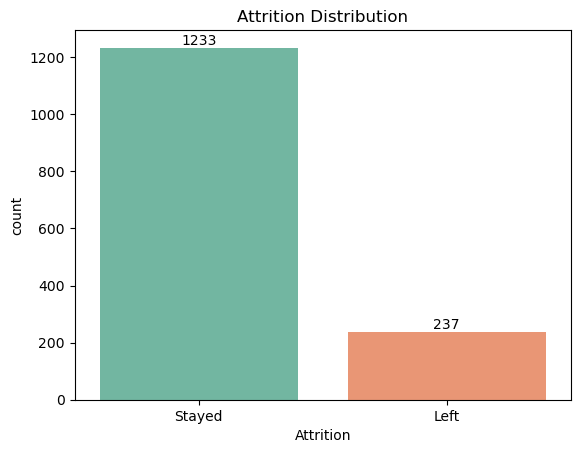

In [136]:
# Attrition distribution
z=sb.countplot(dt,x='Attrition',palette='Set2')
z.bar_label(z.containers[0])
z.bar_label(z.containers[1])
plt.xticks([0, 1], ['Stayed', 'Left'])
plt.title("Attrition Distribution")
plt.show()


**Countplot gives us the total number of counts of how many employees are left or stayed.

C:\Users\asus\AppData\Local\Temp\ipykernel_27000\1737835553.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(dt,x='Attrition', y='MonthlyIncome', palette='Set3')


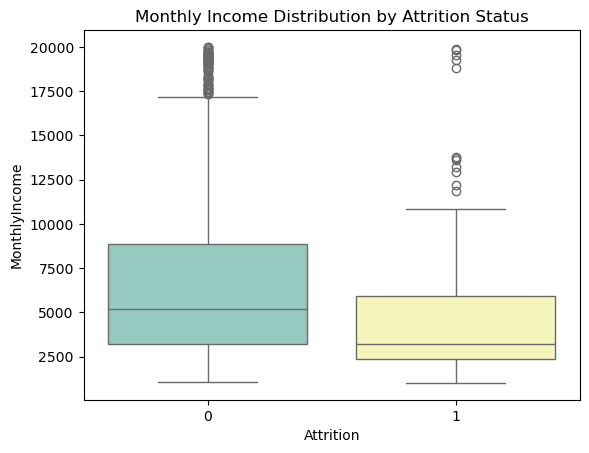

In [138]:
# Monthly Income comparison by boxplot
sb.boxplot(dt,x='Attrition', y='MonthlyIncome', palette='Set3')
plt.title("Monthly Income Distribution by Attrition Status")
plt.show()


**Boxplot  helps to  visualize Distriburion of the Data.

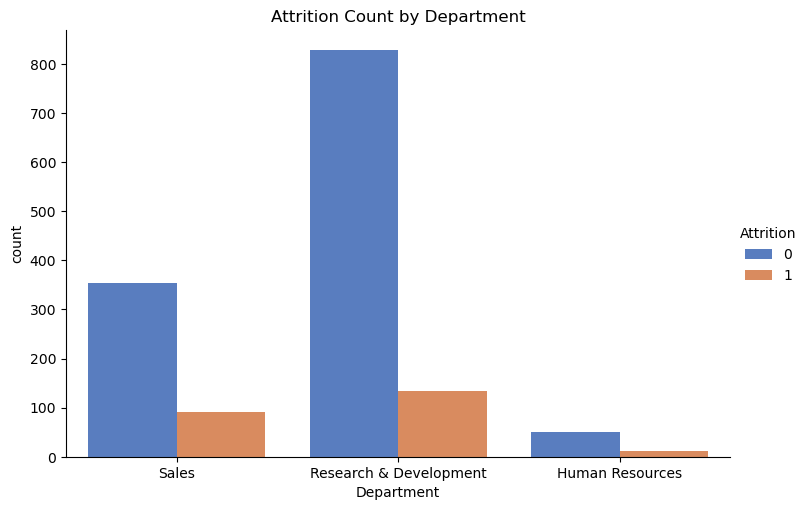

In [298]:
# FacetGrid to analyze attrition across departments
g = sb.catplot(x='Department', hue='Attrition', kind='count', data=dt, aspect=1.5, palette='muted')
plt.title("Attrition Count by Department")
plt.show()


**Catplot function provides access to several axes-level functions that show the **relationship between a numerical and one or more categorical variables** using one of several visual representations. 

C:\Users\asus\AppData\Local\Temp\ipykernel_6088\3596964319.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(dt,x="Attrition",y="JobSatisfaction",palette="Set2")


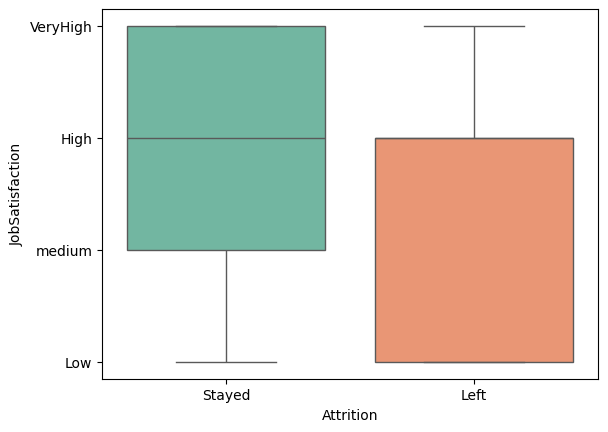

In [302]:
sb.boxplot(dt,x="Attrition",y="JobSatisfaction",palette="Set2")
plt.yticks([1,2,3,4], ['Low','medium','High','VeryHigh'])
plt.xticks([0,1],["Stayed","Left"])
plt.show()


C:\Users\asus\AppData\Local\Temp\ipykernel_27000\2237710649.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(dt,x="Attrition",y="MonthlyIncome",palette="rocket")


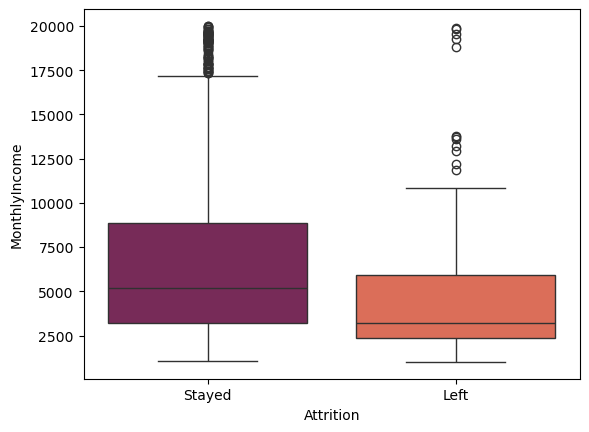

In [145]:
sb.boxplot(dt,x="Attrition",y="MonthlyIncome",palette="rocket")
plt.xticks([0,1],["Stayed","Left"])
plt.show()

C:\Users\asus\AppData\Local\Temp\ipykernel_27000\2374856296.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(dt,x="Attrition",y="PerformanceRating",palette="Set3")


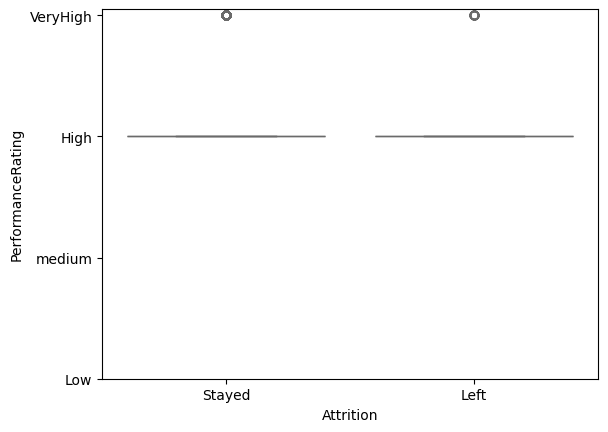

In [150]:
sb.boxplot(dt,x="Attrition",y="PerformanceRating",palette="Set3")
plt.yticks([1,2,3,4], ['Low','medium','High','VeryHigh'])
plt.xticks([0,1],["Stayed","Left"])
plt.show()

In [155]:
def age(x):
    if x>18and x<=25:
        return"18-25"
    elif x>25 and x<=35:
        return"25-35"
    elif x>35 and x<=45:
        return"35-45"
    else:
        return"45+"

<>:2: SyntaxWarning: invalid decimal literal
<>:2: SyntaxWarning: invalid decimal literal
C:\Users\asus\AppData\Local\Temp\ipykernel_27000\1814657232.py:2: SyntaxWarning: invalid decimal literal
  if x>18and x<=25:


In [156]:
dt["Age_Group"]=dt.Age.apply(age)

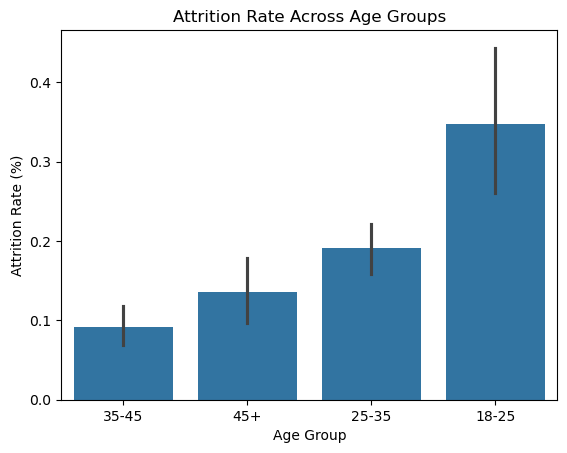

In [157]:
sb.barplot(x='Age_Group', y='Attrition', data=dt)
plt.title('Attrition Rate Across Age Groups')
plt.ylabel('Attrition Rate (%)')
plt.xlabel('Age Group')
plt.show()

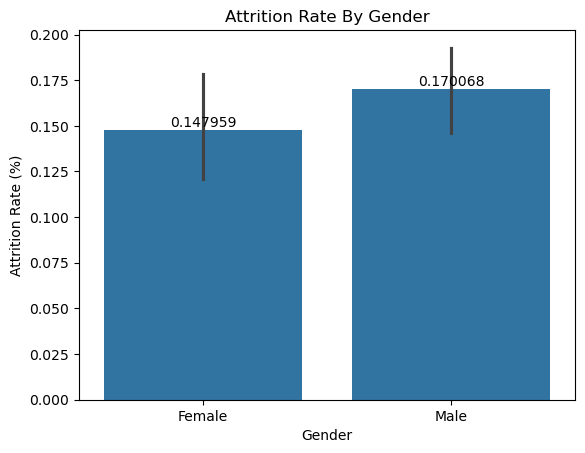

In [158]:
q=sb.barplot(x='Gender', y='Attrition', data=dt)
q.bar_label(q.containers[0])
plt.title('Attrition Rate By Gender')
plt.ylabel('Attrition Rate (%)')
plt.xlabel('Gender')
plt.show()

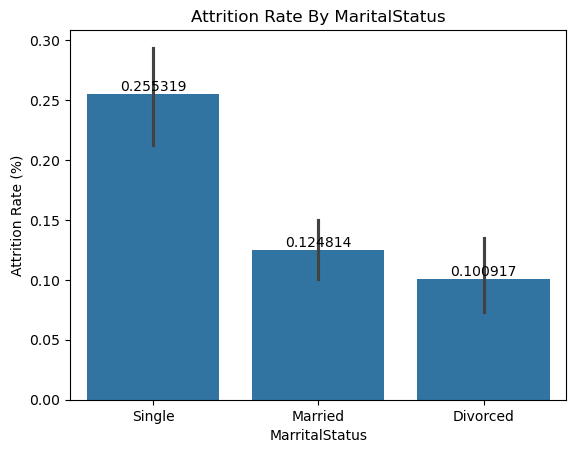

In [160]:
q=sb.barplot(x='MaritalStatus', y='Attrition', data=dt)
q.bar_label(q.containers[0])
plt.title('Attrition Rate By MaritalStatus')
plt.ylabel('Attrition Rate (%)')
plt.xlabel('MarritalStatus')
plt.show()

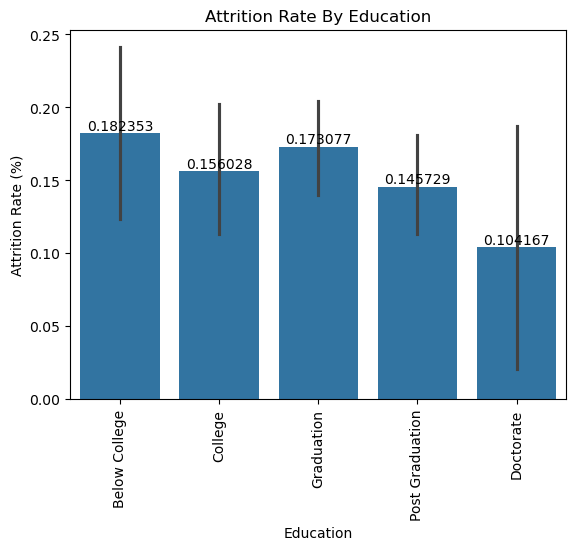

In [163]:
q=sb.barplot(x='Education', y='Attrition', data=dt)
q.bar_label(q.containers[0])
plt.xticks([0,1,2,3,4],["Below College","College","Graduation","Post Graduation","Doctorate"])
plt.title('Attrition Rate By Education')
plt.ylabel('Attrition Rate (%)')
plt.xlabel('Education')
plt.xticks(rotation=90)
plt.show()